In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 48
BATCH_SIZE = 32

class_names = ['cardboard', 'glass', 'metal', 'other', 'paper', 'plastic']

( p_dataset,
  q_dataset, ) = tf.keras.utils.image_dataset_from_directory('./data/KP/',
                    batch_size=(BATCH_SIZE),
                    image_size=(IMAGE_SIZE, IMAGE_SIZE),
                    seed=0,
                    subset='both',
                    validation_split=0.2)

Found 112 files belonging to 6 classes.


Using 90 files for training.
Using 22 files for validation.


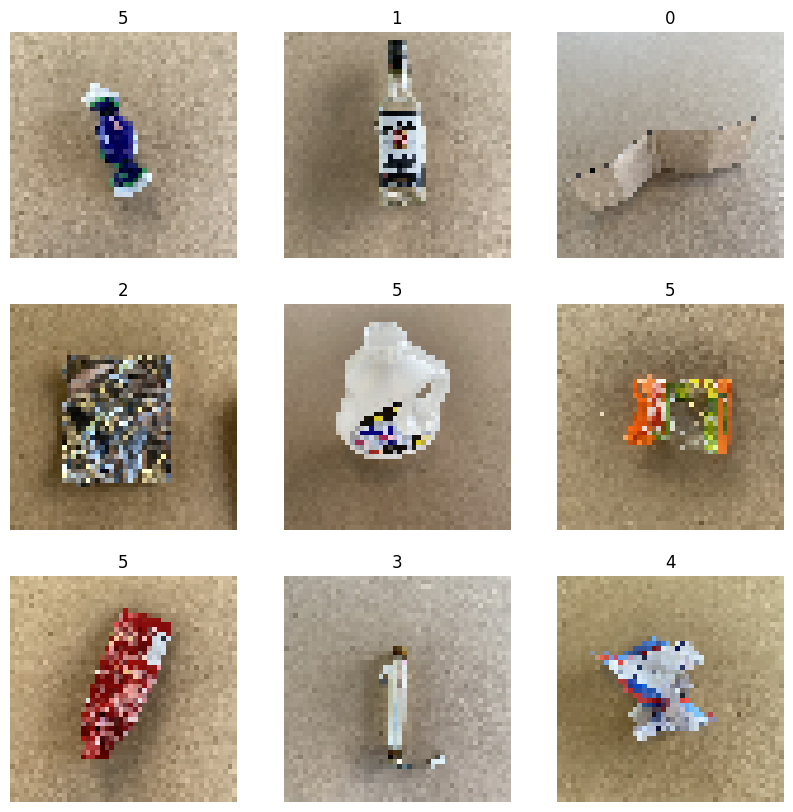

In [4]:
plt.figure(figsize=(10, 10))

for images, labels in p_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())
        plt.axis("off")

In [5]:
# define
model = tf.keras.models.Sequential([
    tf.keras.Input((IMAGE_SIZE, IMAGE_SIZE, 3)),
    
    # augumentation
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(),
    
    # conv2 #1
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    # conv2 #2
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),

    # dense #1
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # output
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

# compile
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# preview
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 48, 48, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       614,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,898 (2.49 MB)

 Trainable params: 652,898 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(p_dataset, validation_data=q_dataset, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8369 - loss: 0.4984 - val_accuracy: 0.4545 - val_loss: 1.8321
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7822 - loss: 0.5992 - val_accuracy: 0.4545 - val_loss: 2.2290
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8301 - loss: 0.4677 - val_accuracy: 0.3636 - val_loss: 2.6098
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8285 - loss: 0.5177 - val_accuracy: 0.5000 - val_loss: 2.0043
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8313 - loss: 0.4494 - val_accuracy: 0.5455 - val_loss: 1.6314
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7824 - loss: 0.5817 - val_accuracy: 0.6818 - val_loss: 1.7269
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7450 - loss: 0.6136 - val_accuracy: 0.5455 - val_loss: 1.9299
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7472 - loss: 0.6481 - val_accuracy: 0.5000 - val_loss: